In [3]:
# From here: https://stackoverflow.com/questions/49264194/import-py-file-in-another-directory-in-jupyter-notebook
import sys
import os

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path)


In [4]:
import numpy as np
import copy

import src.mcmc as mcmc
import src.utils as utils
from src.ansatz import RBM
from src.model import Model
from config_parser import get_config_file

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
visible_layer_size = 4
hidden_layer_size = 10
burn_in_steps = 100,
walker_steps = 1000,
hamming_distance = 1,
seed = 44  # Seed for random number generator


In [10]:
np.random.seed(seed)

b = utils.random_complex_array(visible_layer_size)  # Visible layer bias
c = utils.random_complex_array(hidden_layer_size)  # Hidden layer bias
W = utils.random_complex_matrix(visible_layer_size, hidden_layer_size)  # Visible - hidden weights
H = np.diag(np.random.uniform(-5, 5, 2**visible_layer_size))

In [11]:
walker = mcmc.Walker()
rbm = RBM(visible_bias=b, hidden_bias=c, weights=W)  # Initializing RBM currently with random configuration and parameters
model = Model(rbm, walker, H)  # Initializing model with RBM and Hamiltonian


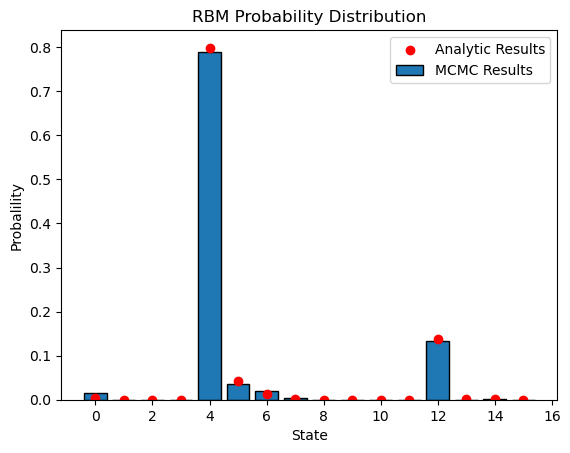

In [12]:
model.walker.estimate_distribution(model.rbm.probability)
history = [utils.binary_array_to_int(state) for state in model.walker.get_history()]

plt.figure(0)
plt.hist(history, density=True, bins=range(2**visible_layer_size+1), edgecolor="black", align='left', rwidth = 0.8)
plt.scatter([x for x in range(2**visible_layer_size)], model.get_prob_distribution(), color='red')
plt.title("RBM Probability Distribution")
plt.xlabel('State')
plt.ylabel('Probalility')
plt.legend(['Analytic Results', 'MCMC Results'])
